In [2]:
!pip3 install pandas

    100% |████████████████████████████████| 14.9MB 65kB/s eta 0:00:011


In [4]:
!pip3 install seaborn

    100% |████████████████████████████████| 184kB 1.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /Users/emily/Library/Caches/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn


In [5]:
import os
import sys
import re
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

r = re.compile(r"Batch (\d+), prob = ([^\s]+)")


In [6]:
def _get_log_extension():
    return '.stderr'

In [7]:
def parse_log(log_file):
    probs = []

    with open(log_file) as f:
        last_class = None

        for l in f.readlines():
            matches = r.search(l)

            if matches:
                batch = int(matches.groups()[0])

                if last_class != batch:
                    last_class = batch
                    probs.append([])

                probs[last_class].append(float(matches.groups()[1]))

    # row x col = alignments x probabilities
    return np.asarray(probs)


In [8]:
input_folder = '/Users/emily/Desktop/EIT_Nice/Term2/sign_language_project/code/probabilities_test_original/'
threshold = 0.9

In [41]:
log_files = sorted([i for i in os.listdir(
        input_folder) if i.endswith(_get_log_extension())])

cmap =sns.diverging_palette(5, 250, as_cmap=True)

In [17]:
log_files

['OAR.test_1_aligned_aligned_03-M-04-D-comp.5689638.stderr',
 'OAR.test_1_aligned_aligned_06-M-04-C-comp.5689639.stderr',
 'OAR.test_1_aligned_aligned_06-M-04-D-comp.5689640.stderr',
 'OAR.test_1_aligned_aligned_07-M-04-D-comp.5689641.stderr',
 'OAR.test_1_aligned_aligned_11-M-04-C-comp.5689642.stderr',
 'OAR.test_1_aligned_aligned_12-M-04-C-comp.5689643.stderr']

Parsing: OAR.test_1_aligned_aligned_03-M-04-D-comp.5689638.stderr
	Index: 25
	Class: 26
Probability: 0.999771

Parsing: OAR.test_1_aligned_aligned_06-M-04-C-comp.5689639.stderr
	Index: 8
	Class: 9
Probability: 0.999838

Parsing: OAR.test_1_aligned_aligned_06-M-04-D-comp.5689640.stderr
	Index: 8
	Class: 9
Probability: 0.999997

Parsing: OAR.test_1_aligned_aligned_07-M-04-D-comp.5689641.stderr
	Index: 3
	Class: 4
Probability: 0.999993

Parsing: OAR.test_1_aligned_aligned_11-M-04-C-comp.5689642.stderr
	Index: 3
	Class: 4
Probability: 1.0

Parsing: OAR.test_1_aligned_aligned_12-M-04-C-comp.5689643.stderr
	Index: 3
	Class: 4
Probability: 0.999915



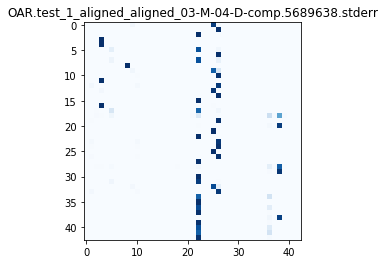

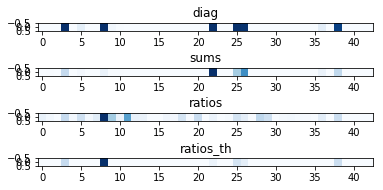

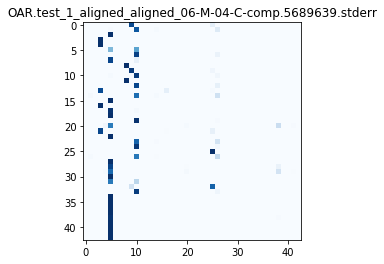

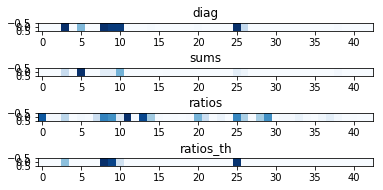

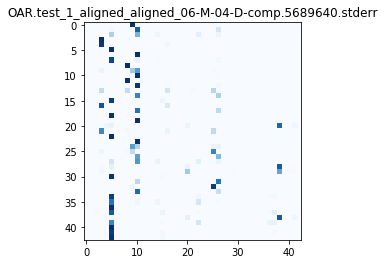

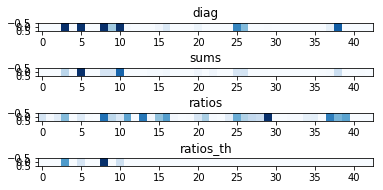

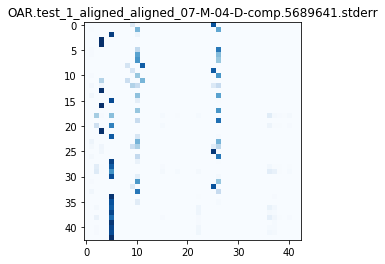

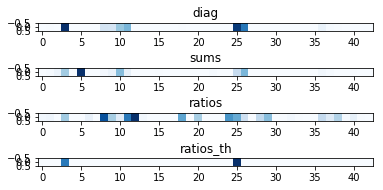

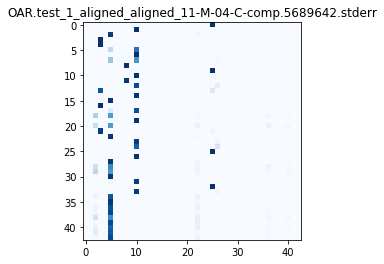

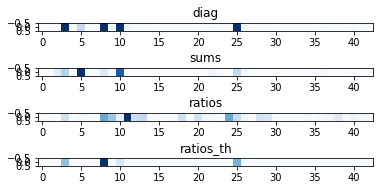

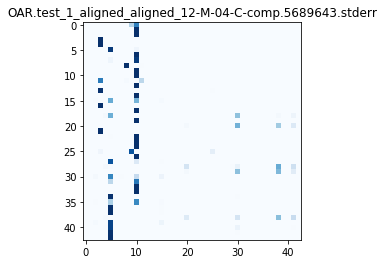

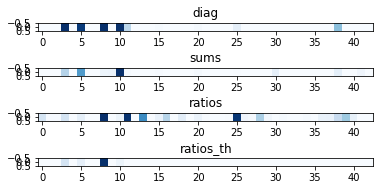

In [12]:
dfs = []
for log_file in log_files:
    print("Parsing:", log_file)
    m = parse_log(os.path.join(input_folder, log_file))
    diag = m.diagonal()
    y_pred = np.argmax(diag)

    print('\tIndex:', y_pred)
    print('\tClass:', y_pred + 1)
    print('Probability:', diag[y_pred])
    print("")
    
    sums = np.apply_along_axis(np.sum, 0, m)
    ratios = diag / sums
    ratios_th = ratios.copy()
    ratios_th[diag < threshold] = 0
    y_pred = np.argmax(ratios_th)

    plt.figure()
    plt.title(log_file)
    plt.imshow(m, interpolation='none', cmap='Blues')

    plt.figure()
    plt.subplot(511)
    plt.title("diag")
    plt.imshow(diag.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(512)
    plt.title("sums")
    plt.imshow(sums.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(513)
    plt.title("ratios")
    plt.imshow(ratios.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(514)
    plt.title("ratios_th")
    plt.imshow(ratios_th.reshape((1, 43)),
               interpolation='none', cmap='Blues')
    
    df = pd.DataFrame(m)
    dfs.append(df)


In [56]:
i = 0
print(log_files[i])
m = parse_log(os.path.join(input_folder, log_files[i]))
df = pd.DataFrame(m)
df.round(3).style.background_gradient(cmap, low=0, high=1)

OAR.test_1_aligned_aligned_03-M-04-D-comp.5689638.stderr


In [55]:
i = 1
print(log_files[i])
m = parse_log(os.path.join(input_folder, log_files[i]))
df = pd.DataFrame(m)
df.round(3).style.background_gradient(cmap, low=0, high=1)

OAR.test_1_aligned_aligned_06-M-04-C-comp.5689639.stderr


In [51]:
i = 2
print(log_files[i])
m = parse_log(os.path.join(input_folder, log_files[i]))
df = pd.DataFrame(m)
df.round(3).style.background_gradient(cmap, low=0, high=1)

OAR.test_1_aligned_aligned_06-M-04-D-comp.5689640.stderr


In [52]:
i = 3
print(log_files[i])
m = parse_log(os.path.join(input_folder, log_files[i]))
df = pd.DataFrame(m)
df.round(3).style.background_gradient(cmap, low=0, high=1)

OAR.test_1_aligned_aligned_07-M-04-D-comp.5689641.stderr


In [53]:
i = 4
print(log_files[i])
m = parse_log(os.path.join(input_folder, log_files[i]))
df = pd.DataFrame(m)
df.round(3).style.background_gradient(cmap, low=0, high=1)

OAR.test_1_aligned_aligned_11-M-04-C-comp.5689642.stderr
